In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
mnist = fetch_openml('mnist_784',version=1)
print(mnist.keys())
X,y=mnist["data"],mnist["target"]
print(X.shape,y.shape)
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
(70000, 784) (70000,)


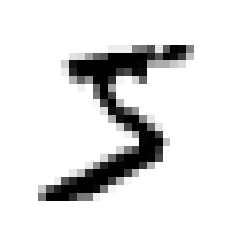

In [2]:
X_ = np.array(X)
y_=np.array(y)
some_digit_image= X_[0,:].reshape(28,28)
some_digit=X_[0,:].reshape(-1,784)
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [3]:
print(y_[0])

5


In [4]:
X_train, X_test, y_train, y_test=X_[:60000,:].reshape(-1,784),X_[60000:,:].reshape(-1,784),y_[:60000],y_[60000:]

y_train_5 =  y_train=='5'
y_test_5 = y_test=='5'
print(y_train_5)

[ True False False ...  True False False]


In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
sgd_pred= sgd_clf.predict(some_digit)
print(sgd_pred)

[ True]


In [6]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_5,y_train_pred))

[[53892   687]
 [ 1891  3530]]


In [7]:
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

0.8370879772350012
0.6511713705958311


In [8]:
from sklearn.metrics import f1_score
print(f1_score(y_train_5,y_train_pred))

0.7325171197343846


In [9]:
y_scores =  sgd_clf.decision_function(some_digit)
print(y_scores)

[2164.22030239]


In [10]:
y_scores= cross_val_predict(sgd_clf,X_train, y_train_5,cv=3,method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [15]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='recall')
    plt.legend()
    plt.xlim(-40000,40000)
    plt.xlabel('threshold')

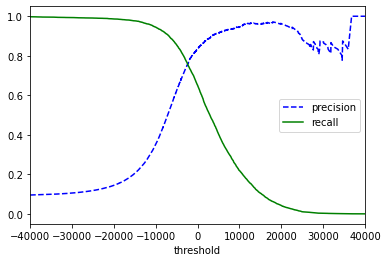

In [16]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [ ]:
임계값을 올리더라도 정밀도가 낮아질 때가 있다. 